In [1]:
#import packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
import networkx as nx


In [2]:
# Import customer list
u_df=pd.read_csv('./data/Users_sanitized.csv', sep=',', index_col='UserId')
u_df.head()

Unnamed: 0       CreationTimestamp  \
UserId                                                                     
eecc280c-9941-41bc-b26f-d519da794a5d           0  1970-01-01 00:00:00+00   
d9d8a373-29f0-4fe5-8f17-39669083ac48           1  1970-01-01 00:00:00+00   
8f27c773-334a-4f8c-82c2-8cdec215a9bb           2  1970-01-01 00:00:00+00   
aefe87c8-f537-4bdc-954f-6833a047081b           3  1970-01-01 00:00:00+00   
6ad98c4e-18e3-4a6e-ac94-1338cb239c2d           4  1970-01-01 00:00:00+00   

                                     ClaimType  IsOfflineUser  
UserId                                                         
eecc280c-9941-41bc-b26f-d519da794a5d  consumer          False  
d9d8a373-29f0-4fe5-8f17-39669083ac48  consumer           True  
8f27c773-334a-4f8c-82c2-8cdec215a9bb  consumer           True  
aefe87c8-f537-4bdc-954f-6833a047081b  consumer           True  
6ad98c4e-18e3-4a6e-ac94-1338cb239c2d  consumer           True

In [3]:
# Import container list
c_df=pd.read_csv('./data/Containerlist.csv', sep=',', index_col='Id')
c_df.head()

Name  TypeId  \
Id                                                             
00004f6b-e416-4a86-91df-5d177520d3a0  Marinha Grande       1   
00005175-379b-458a-9740-7741814674e4          Dayton       1   
0000bbe4-2051-4c32-850f-220288b868a6           Nahal       6   
0000c7c3-8f3c-4eb2-b586-dcae82555d16      Winfred F.       1   
0000f63c-9747-4c15-871f-f011198c8f88    Billy Wilder       3   

                                                               CreatedById  \
Id                                                                           
00004f6b-e416-4a86-91df-5d177520d3a0  cb73faf3-410a-4e71-83cb-c303efeaeba8   
00005175-379b-458a-9740-7741814674e4  fd3ec806-b763-48a9-992b-09e50c8a274c   
0000bbe4-2051-4c32-850f-220288b868a6                                   NaN   
0000c7c3-8f3c-4eb2-b586-dcae82555d16  cb73faf3-410a-4e71-83cb-c303efeaeba8   
0000f63c-9747-4c15-871f-f011198c8f88  fd3ec806-b763-48a9-992b-09e50c8a274c   

                                     ShortId  
Id                                            
00004f6b-e416-4a86-91df-5d177520d3a0  61CQAR  
00005175-379b-458a-9740-7741814674e4     NaN  
0000bbe4-2051-4c32-850f-220288b868a6     NaN  
0000c7c3-8f3c-4eb2-b586-dcae82555d16  Z9HBTP  
0000f63c-9747-4c15-871f-f011198c8f88     NaN

In [4]:
# Size of df
print(c_df.shape)

c_df.TypeId.unique()

#c_df.Name.unique()


(431444, 4)


array([ 1,  6,  3,  2, 10, 12,  8,  5,  4,  7,  9, 13, 11, 15])

In [5]:
# Import container typs
c_type_df=pd.read_csv('./data/ContainerTypes.csv', sep=',', index_col='Id')
print(c_type_df.shape)
c_type_df.head()

(16, 4)


Name                Description  CategoryId  IsWhiteLabel
Id                                                                  
1   1250ml Bowl            A standard bowl         1.0         False
2    500ml Bowl             A smaller Bowl         1.0         False
3    750ml Bowl              A medium bowl         1.0         False
4      Sushibox            A box for sushi         1.0         False
5           Cup  A reusable cocktail glass         1.0         False

In [87]:
# Import merchants
m_df=pd.read_csv('./data/MerchantInfos.csv', sep=',', index_col='Id')
m_df['CreationDate']= pd.to_datetime(m_df['CreationDate'])
m_df.head()


MerchantId  \
Id                                                                           
83787f7a-b659-44b6-a8aa-d1ef5b958a65  ed2c2eea-8399-4779-a9ea-dafb77878965   
4cd61f39-ddce-449f-8d1a-ef95c7b25307  cc8b8b51-efd7-4d74-84c8-4721619867df   
fa17e91f-cdfb-4912-81c9-92cd0b87328e  78ecc5a3-0ea0-4820-9fd2-637c95d73782   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c  f9b37c73-3a67-47b3-82cd-cfd1d6fafd6a   
f421a5f6-ba67-4336-afc3-021a04da5005  556becfc-1aac-43e2-87d9-cbc3fab0f4b0   

                                                           Name  Longitude  \
Id                                                                           
83787f7a-b659-44b6-a8aa-d1ef5b958a65   SAP WDF49 - Food Factory   8.642271   
4cd61f39-ddce-449f-8d1a-ef95c7b25307                  Guten Dag  13.413539   
fa17e91f-cdfb-4912-81c9-92cd0b87328e   Gasthaus Brückenschänke    7.771990   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c                      Com A  13.422482   
f421a5f6-ba67-4336-afc3-021a04da5005  BLE - Betriebsgastronomie   7.184823   

                                       Latitude               CreationDate  \
Id                                                                           
83787f7a-b659-44b6-a8aa-d1ef5b958a65  49.292543 2021-06-28 11:56:10.812661   
4cd61f39-ddce-449f-8d1a-ef95c7b25307  52.548254 2020-07-14 19:44:49.101383   
fa17e91f-cdfb-4912-81c9-92cd0b87328e  49.943655 2021-01-20 10:25:12.831661   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c  52.500293 2020-08-26 06:53:57.107271   
f421a5f6-ba67-4336-afc3-021a04da5005  50.672743 2020-10-01 09:33:59.032472   

                                      CategoryId  SellsOfflineCards  \
Id                                                                    
83787f7a-b659-44b6-a8aa-d1ef5b958a65           4              False   
4cd61f39-ddce-449f-8d1a-ef95c7b25307           2              False   
fa17e91f-cdfb-4912-81c9-92cd0b87328e           2              False   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c           2              False   
f421a5f6-ba67-4336-afc3-021a04da5005           4              False   

                                              StreetAddress ZipCode  \
Id                                                                    
83787f7a-b659-44b6-a8aa-d1ef5b958a65  Dietmar-Hopp-Allee 17   69190   
4cd61f39-ddce-449f-8d1a-ef95c7b25307  Schönhauser Allee 120   10437   
fa17e91f-cdfb-4912-81c9-92cd0b87328e         Staatsstraße 4   55442   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c      Oranienstraße 191   10999   
f421a5f6-ba67-4336-afc3-021a04da5005      Deichmanns Aue 29   53179   

                                            City Country  CanGetBowl  \
Id                                                                     
83787f7a-b659-44b6-a8aa-d1ef5b958a65    Walldorf     NaN        True   
4cd61f39-ddce-449f-8d1a-ef95c7b25307      Berlin      DE       False   
fa17e91f-cdfb-4912-81c9-92cd0b87328e  Stromberg      NaN        True   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c      Berlin     NaN        True   
f421a5f6-ba67-4336-afc3-021a04da5005        Bonn     NaN        True   

                                      CanPreorder  IsPublished  ShowInStats  
Id                                                                           
83787f7a-b659-44b6-a8aa-d1ef5b958a65        False         True         True  
4cd61f39-ddce-449f-8d1a-ef95c7b25307         True         True         True  
fa17e91f-cdfb-4912-81c9-92cd0b87328e        False         True         True  
7c376406-7a5b-4a6c-b22c-e7e02ae0080c        False         True         True  
f421a5f6-ba67-4336-afc3-021a04da5005        False        False         True

In [90]:
min(m_df['CreationDate'])

Timestamp('2019-09-08 10:22:48.441084')

In [88]:
m_df.groupby(by='MerchantId').size().sort_values()

MerchantId
fff28426-5a3f-4e99-9d50-1787b8e31b54     1
9a48c5a5-5f06-4274-b1e6-4bc25943a8cf     1
9a43fa7f-ba16-4cad-8dea-804a8d8a17a2     1
9a142832-9161-4249-94be-a9e42dc7fa83     1
9a0f7966-2e33-44a1-8c63-fc50f53b75ee     1
                                        ..
f66c97a1-6e67-49a1-889d-fa75aeae356b    14
e97abc44-89c7-4771-952b-b3dab56625c3    15
ed2c2eea-8399-4779-a9ea-dafb77878965    16
3afdaa57-ecc2-4c79-94a3-d10700a299b0    22
6fde0c68-6c47-4183-b725-c5de30f90f02    25
Length: 1720, dtype: int64

In [89]:
import folium

map_osm = folium.Map(location=[50, 5],zoom_start=5)
for ind, row in m_df.iterrows():
    folium.CircleMarker(location=[row["Latitude"], row["Longitude"]],radius=2, popup=ind).add_to(map_osm)
map_osm

### 

In [9]:
# Import regions
r_df=pd.read_csv('./data/Regions.csv', sep=',', index_col='Id')
r_df.head()

Name
Id                                
0                        No Region
1               01_R01_Munich (BY)
2            01_R02_Stuttgart (BW)
3        01_R03_Frankfurt (HE, SL)
4   01_R04_Cologne (NRW_South, RP)

In [17]:
# import transactions
in_df=pd.read_csv('./data/Total Checkins_2.csv', sep=',')





in_df['OwnerSince']= pd.to_datetime(in_df['OwnerSince'])
in_df['OwnerTill']= pd.to_datetime(in_df['OwnerTill'])

print(in_df.info())
print('shape of df ', in_df.shape)

print(min(in_df['OwnerSince']),max(in_df['OwnerSince'] ))
in_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820995 entries, 0 to 1820994
Data columns (total 11 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Unnamed: 0          int64              
 1   UserId              object             
 2   ExternalPickpackId  object             
 3   StoreId             object             
 4   StoreName           object             
 5   LocationId          int64              
 6   TransactionId       object             
 7   OwnerSince          datetime64[ns, UTC]
 8   OwnerTill           datetime64[ns, UTC]
 9   ContainerId         object             
 10  ContainerType       object             
dtypes: datetime64[ns, UTC](2), int64(2), object(7)
memory usage: 152.8+ MB
None
shape of df  (1820995, 11)
2019-09-24 17:32:45.542193+00:00 2021-09-30 20:26:01.392721+00:00


Unnamed: 0                                UserId    ExternalPickpackId  \
0           0  cbde804e-b04d-41d2-a57e-3aec91465301  vytal_5zAtNXBLZFNVeT   
1           1  1d2a361e-fe0b-458d-ab8e-6cdbc3c7be4b  vytal_cmS01lKsHGq1wn   
2           2  1d2a361e-fe0b-458d-ab8e-6cdbc3c7be4b  vytal_cmS01lKsHGq1wn   
3           3  1d2a361e-fe0b-458d-ab8e-6cdbc3c7be4b  vytal_cmS01lKsHGq1wn   
4           4  79a7686c-9507-4056-b68f-be013f5c7308  vytal_VnxpeFCNaGgD98   

                                StoreId                       StoreName  \
0  e6e6d4e5-56dd-4361-8ebd-ebdd865f41ea          Mashery Hummus Kitchen   
1  90c6fe4e-8df8-406c-ac64-d5faccefe95d     Chay Village Friedrichshain   
2  90c6fe4e-8df8-406c-ac64-d5faccefe95d     Chay Village Friedrichshain   
3  90c6fe4e-8df8-406c-ac64-d5faccefe95d     Chay Village Friedrichshain   
4  33e9bd0d-b8e0-4e3f-b563-b6ffd5aea459  CA PHAO Vietnamese Street Food   

   LocationId                         TransactionId  \
0     3774060  474b0cdb-1a56-45dc-8149-43ab92e47750   
1     3703175  6b3740cb-ea6e-4db6-abb6-8579bcbfe452   
2     3777296  ccf9be99-c571-4739-9093-6f49bbc90f7e   
3     3777295  ccf9be99-c571-4739-9093-6f49bbc90f7e   
4     3812469  d7109ab4-a47b-43a0-9672-9b11623f720a   

                        OwnerSince                        OwnerTill  \
0 2021-08-28 11:37:06.555236+00:00 2021-08-31 21:07:58.166179+00:00   
1 2021-08-23 17:38:26.062007+00:00 2021-08-31 20:19:32.375828+00:00   
2 2021-08-29 15:28:34.513007+00:00 2021-08-31 20:19:32.375828+00:00   
3 2021-08-29 15:28:34.513007+00:00 2021-08-31 20:19:32.375828+00:00   
4 2021-08-31 17:22:15.084687+00:00 2021-08-31 20:04:52.620038+00:00   

                            ContainerId     ContainerType  
0  d28c7875-db51-45b9-857b-80ed0f1c7988       1250ml Bowl  
1  777befa2-f3ce-4861-87ac-3e8439efdf1f  Compartment Bowl  
2  10d81c1e-93ba-4aba-a780-900544dd8ba1        500ml Bowl  
3  98528279-8a03-49a0-bd89-a4ad66411e7f        750ml Bowl  
4  96f35fb2-cdbb-4e46-84cc-ef7a73cbf084        500ml Bowl

In [18]:
in_df['TransactionId'].is_unique


False

In [19]:
in_df.groupby(by='TransactionId').size().sort_values(ascending=False).head(10)

TransactionId
49e518fb-7e24-4c51-843e-4b21dc591dd9    127
5944763c-a9e5-4658-9806-5af868b66d04    111
1e7e5067-113e-4703-9539-8199eed3854c    105
9d60b346-9219-4ec2-be07-9a67f1ece476    101
61148594-b72e-42d5-b8cf-739de3e94075     99
a73401d0-aa31-4ec3-89fb-a40a31c48aee     98
018a63a9-a01a-4e33-a73b-ba9b0624f639     93
92ded3d2-f080-4118-936f-4d61d3f6727f     92
466f2df0-e126-47bb-a2b0-8be19499f6ef     91
2127aadf-ae08-4641-b2ed-8666e1c58c66     91
dtype: int64

In [20]:
in_df.groupby(by='TransactionId')['UserId'].nunique().sort_values(ascending=False)

TransactionId
fffffc43-9037-4f10-be07-f0c44c69e75e    1
55964848-ac4a-41e9-b46d-f2490e4735d8    1
5595ff51-afe8-460c-9b6d-094fb39d5164    1
55960d62-feb3-4cd7-9e9a-6d2bc6360efc    1
55962f95-b2bd-41e7-b97d-4317969a8b59    1
                                       ..
aab4de75-bd06-4b7f-b6b9-58524ddc44d6    1
aab4da31-2cdb-4495-a62d-21e43b8c80ea    1
aab4caa9-7caa-45b0-b62d-19dd2c6fb32c    1
aab4c76a-61b3-44a8-b42a-6d967bb2fd6b    1
00001fcf-6a41-478c-8528-bfdbb8bcc2cf    1
Name: UserId, Length: 1171291, dtype: int64

In [23]:
out_df=pd.read_csv('./data/Total Checkout_2.csv', sep=',')
out_df['OwnerSince']= pd.to_datetime(out_df['OwnerSince'])
out_df['OwnerTill']= pd.to_datetime(out_df['OwnerTill'])
print(out_df.info())
print('shape of df :', out_df.shape)
out_df.head(2)


/Users/kultiginbozdemir/opt/anaconda3/envs/CO2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (6,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862237 entries, 0 to 1862236
Data columns (total 12 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Unnamed: 0          int64              
 1   UserId              object             
 2   ExternalPickpackId  object             
 3   StoreId             object             
 4   StoreName           object             
 5   LocationId          int64              
 6   TransactionId       object             
 7   OwnerSince          datetime64[ns, UTC]
 8   OwnerTill           datetime64[ns, UTC]
 9   ContainerId         object             
 10  DeliveryTokenId     object             
 11  ContainerType       object             
dtypes: datetime64[ns, UTC](2), int64(2), object(8)
memory usage: 170.5+ MB
None
shape of df : (1862237, 12)


Unnamed: 0                                UserId    ExternalPickpackId  \
0           0  db70348b-76ae-4bff-b3ef-c1c727cc3be7  vytal_yjCP6j0bbUVAu0   
1           1  66c1e632-a6d1-4203-bc6a-2b4c8e669e92  vytal_OwGu7ZOXba3jbu   

                                StoreId                       StoreName  \
0  e6e6d4e5-56dd-4361-8ebd-ebdd865f41ea          Mashery Hummus Kitchen   
1  e78d649c-7ced-4e07-95d0-8a25c58e1bc9  Krua Thai (Belgisches Viertel)   

   LocationId TransactionId                       OwnerSince  \
0       63672           NaN 2020-09-01 18:25:20.296746+00:00   
1       63666           NaN 2020-09-01 18:14:25.942667+00:00   

                         OwnerTill                           ContainerId  \
0 2020-09-01 18:25:20.296746+00:00  4a9a935d-2260-4cfb-9bad-9751e48291a0   
1 2020-09-01 18:14:25.942667+00:00  7f161610-c775-406f-a67c-95d322b463f6   

  DeliveryTokenId ContainerType  
0             NaN   1250ml Bowl  
1             NaN   1250ml Bowl

In [26]:
out_df.groupby(by='TransactionId')['UserId'].nunique().sort_values(ascending=False)

TransactionId
092fbc3d-2267-4325-a509-0b495fb38b9c    182
6de4ed83-93cc-48e7-81e0-d2279702fef9    117
33aedccc-2a38-45bb-b71e-ad420a10409c    114
0fc2bef3-0a8f-4484-9a46-9a8aa519c119    114
88f30044-d658-4a8a-b6b5-5274e8064d48    109
                                       ... 
93ea9e9b-bf75-4845-93a5-22f6c1035a83      1
93eaf409-4746-4c41-a82e-183f8006a4a0      1
93eb14d5-ac3e-4317-912c-3dd655341472      1
93eb522e-dc7e-47c5-880e-2e180588b991      1
7fe4f2c2-a1f5-4632-a30b-5e7997341a9f      1
Name: UserId, Length: 594540, dtype: int64

In [27]:
out_df.groupby(by='TransactionId').size().sort_values(ascending=False).head(9000).tail(3)

TransactionId
8cbf2fa2-5357-4571-a08c-139646ebdf1d    17
038443b4-c67e-40e6-8c13-8b6e67f4f859    17
8cc6bef7-b166-4dd8-baee-60484000c22c    17
dtype: int64

In [28]:
out_df[out_df['TransactionId']=='01c67a73-e52b-400f-9dcc-0059799ddfe7']

Unnamed: 0                                UserId  \
319009       319009  54b0cd36-eb71-4dd4-8cb2-89fc9f28031f   
334678       334678  2e73982b-a048-489e-aadc-8527725dd2f3   
359987       359987  240a2ec9-f5ae-4b6f-a5a4-123a73c1062b   
360099       360099  0c053d30-90ae-48f0-9c31-60f8837a9e9f   
361066       361066  ee0331a1-c9d4-4771-9fb8-7afbd79b8616   
361067       361067  ee0331a1-c9d4-4771-9fb8-7afbd79b8616   
368397       368397  244400de-c5bc-41b1-90f8-e1339866f66c   
368458       368458  588e85f2-53f3-44d2-99fc-ff8c2e70d888   
370607       370607  7421eedd-e918-4bb6-af52-22ecd57fc081   
379653       379653  e42ffa50-b02d-4b6f-b0c9-eba4313e5f9f   
379654       379654  e42ffa50-b02d-4b6f-b0c9-eba4313e5f9f   
401691       401691  6e924989-650b-4e32-b2dc-ba8cdda9c5f4   
415714       415714  fbc705a5-74bd-4877-bd56-f848c18fcb39   
415716       415716  fbc705a5-74bd-4877-bd56-f848c18fcb39   
1338718     1338718  123bba2e-8487-421d-b96a-609d3692c890   
1338988     1338988  54b0cd36-eb71-4dd4-8cb2-89fc9f28031f   

           ExternalPickpackId                               StoreId  \
319009   vytal_lNQs7SfBmx5t92  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
334678   vytal_zKcUsAA74YPBYM  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
359987   vytal_rrJdR5h2Af3eKj  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
360099   vytal_WG4B2aYj3HJFeH  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
361066   vytal_7rlawQFeM7tVoJ  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
361067   vytal_7rlawQFeM7tVoJ  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
368397   vytal_Y0sCqIubq52pag  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
368458   vytal_xa8c3rFszSLefn  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
370607   vytal_mRrwaNp8GfJTG8  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
379653   vytal_BXAKI0XYFWEFYV  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
379654   vytal_BXAKI0XYFWEFYV  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
401691   vytal_E1o32JxTq3Ma5X  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
415714   vytal_WtG8tutcPxZ8JS  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
415716   vytal_WtG8tutcPxZ8JS  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
1338718  vytal_gEDy8ov62Habxv  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
1338988  vytal_lNQs7SfBmx5t92  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   

                 StoreName  LocationId                         TransactionId  \
319009   Jaegers FeineKost     1626721  01c67a73-e52b-400f-9dcc-0059799ddfe7   
334678   Jaegers FeineKost     1626716  01c67a73-e52b-400f-9dcc-0059799ddfe7   
359987   Jaegers FeineKost     1626722  01c67a73-e52b-400f-9dcc-0059799ddfe7   
360099   Jaegers FeineKost     1626713  01c67a73-e52b-400f-9dcc-0059799ddfe7   
361066   Jaegers FeineKost     1626707  01c67a73-e52b-400f-9dcc-0059799ddfe7   
361067   Jaegers FeineKost     1626719  01c67a73-e52b-400f-9dcc-0059799ddfe7   
368397   Jaegers FeineKost     1626715  01c67a73-e52b-400f-9dcc-0059799ddfe7   
368458   Jaegers FeineKost     1626720  01c67a73-e52b-400f-9dcc-0059799ddfe7   
370607   Jaegers FeineKost     1626708  01c67a73-e52b-400f-9dcc-0059799ddfe7   
379653   Jaegers FeineKost     1626709  01c67a73-e52b-400f-9dcc-0059799ddfe7   
379654   Jaegers FeineKost     1626712  01c67a73-e52b-400f-9dcc-0059799ddfe7   
401691   Jaegers FeineKost     1626710  01c67a73-e52b-400f-9dcc-0059799ddfe7   
415714   Jaegers FeineKost     1626724  01c67a73-e52b-400f-9dcc-0059799ddfe7   
415716   Jaegers FeineKost     1626717  01c67a73-e52b-400f-9dcc-0059799ddfe7   
1338718  Jaegers FeineKost     1626718  01c67a73-e52b-400f-9dcc-0059799ddfe7   
1338988  Jaegers FeineKost     1626711  01c67a73-e52b-400f-9dcc-0059799ddfe7   

                              OwnerSince                        OwnerTill  \
319009  2021-04-09 11:48:49.452363+00:00 2021-04-28 17:27:01.374037+00:00   
334678  2021-04-09 11:48:49.452363+00:00 2021-04-27 10:35:25.529667+00:00   
359987  2021-04-09 11:48:49.452363+00:00 2021-04-23 11:44:39.300742+00:00   
360099  2021-04-09 11:48:49.452363+00:00 2021-04-23 11:37:54.778965+00:00   
361066  2021-04-0

In [29]:
import datetime as dt


date_time_str = '2021-05-19 17:20:15'
date_time_obj = dt.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')


print ("The type of the date is now",  type(date_time_obj))
print ("The date is", date_time_obj)
print(date_time_obj.date())
date_=in_df['OwnerSince'].dt.date==date_time_obj.date()
container=in_df['ContainerId']=='2dc69c25-a17a-4fe9-8967-56e74c027468'
transaction_id=in_df[date_ & container]['TransactionId']
print(transaction_id)

The type of the date is now <class 'datetime.datetime'>
The date is 2021-05-19 17:20:15
2021-05-19
747611    4222158d-02ea-4891-8961-cd5d27135376
Name: TransactionId, dtype: object


In [30]:
transaction=in_df['TransactionId']=='4222158d-02ea-4891-8961-cd5d27135376'
in_df[transaction ]

Unnamed: 0                                UserId  \
747610      747610  54b0cd36-eb71-4dd4-8cb2-89fc9f28031f   
747611      747611  54b0cd36-eb71-4dd4-8cb2-89fc9f28031f   
809477      809477  54b0cd36-eb71-4dd4-8cb2-89fc9f28031f   

          ExternalPickpackId                               StoreId  \
747610  vytal_lNQs7SfBmx5t92  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
747611  vytal_lNQs7SfBmx5t92  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
809477  vytal_lNQs7SfBmx5t92  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   

                StoreName  LocationId                         TransactionId  \
747610  Jaegers FeineKost     2346675  4222158d-02ea-4891-8961-cd5d27135376   
747611  Jaegers FeineKost     2346674  4222158d-02ea-4891-8961-cd5d27135376   
809477  Jaegers FeineKost     2346676  4222158d-02ea-4891-8961-cd5d27135376   

                             OwnerSince                        OwnerTill  \
747610 2021-05-19 17:20:15.690137+00:00 2021-06-02 17:22:11.860202+00:00   
747611 2021-05-19 17:20:15.690137+00:00 2021-06-02 17:22:11.860202+00:00   
809477 2021-05-19 17:20:15.690137+00:00 2021-05-26 16:40:52.684829+00:00   

                                 ContainerId ContainerType  
747610  aab5c654-358e-48f2-bad4-36c9369ea462   1250ml Bowl  
747611  2dc69c25-a17a-4fe9-8967-56e74c027468   1250ml Bowl  
809477  919e58bb-fdae-4f22-9c64-6cd4d0eb8886   1250ml Bowl

In [31]:
#Lets follow the journey of a container...
in_df[in_df['ContainerId']=='69d293fa-f7ce-4039-9c52-52cf03ba7ce6'].sort_values(by='OwnerSince')

Unnamed: 0                                UserId  \
1612563     1612563  05c05bde-7e0b-4cd4-a4e0-63d8c020dccf   
1562377     1562377  83074cff-0ca2-4e19-a625-2338a420ea88   
1513406     1513406  95e79468-c0dc-41bf-85e6-73d3ac96532b   
1448934     1448934  2638dc36-b123-44a6-9db6-00f1f5b43dfb   
1427529     1427529  83074cff-0ca2-4e19-a625-2338a420ea88   
889619       889619  349ebe53-3897-4d1d-b511-179c9145ce7e   
735719       735719  e4fbddb3-305b-43f2-b4f0-1dfe6226e591   
613034       613034  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
576315       576315  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
544888       544888  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
484734       484734  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
406388       406388  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
134582       134582  11023101-4ad5-456d-a308-da4e56b84832   
32496         32496  1c0da369-599f-49ee-bd80-27b100f73754   
342346       342346  edd29b6b-1a3c-4c68-bce1-dd5244985e25   

           ExternalPickpackId                               StoreId  \
1612563  vytal_eu8NIO6agLuxOK  6d1fd649-f721-4ec4-a279-ac1176f771c9   
1562377  vytal_nLFwx3UJxIUNyi  6d1fd649-f721-4ec4-a279-ac1176f771c9   
1513406  vytal_bVxGec67XtgSFM  6d1fd649-f721-4ec4-a279-ac1176f771c9   
1448934  vytal_Rp5xgJuWc1ylkA  6d1fd649-f721-4ec4-a279-ac1176f771c9   
1427529  vytal_nLFwx3UJxIUNyi  6d1fd649-f721-4ec4-a279-ac1176f771c9   
889619   vytal_X9zCXFKSznzFPk  be176976-3230-4ec2-9985-e5246a76d746   
735719   vytal_RftiJCZurkwIWP  be176976-3230-4ec2-9985-e5246a76d746   
613034   vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
576315   vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
544888   vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
484734   vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
406388   vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
134582   vytal_jSRAmNPxpEpTR4  be176976-3230-4ec2-9985-e5246a76d746   
32496    vytal_m4MuhLYWUkYrje  be176976-3230-4ec2-9985-e5246a76d746   
342346   vytal_s3a5Ik2sQk0Iw8  22502b98-d545-4554-a834-43f007b86171   

                        StoreName  LocationId  \
1612563                 Die Kurve     1161191   
1562377                 Die Kurve     1287626   
1513406                 Die Kurve     1466353   
1448934                 Die Kurve     1527516   
1427529                 Die Kurve     1613129   
889619   Greentrees Lorettostraße     2260863   
735719   Greentrees Lorettostraße     2519819   
613034   Greentrees Lorettostraße     2834457   
576315   Greentrees Lorettostraße     2888128   
544888   Greentrees Lorettostraße     2967980   
484734   Greentrees Lorettostraße     3038054   
406388   Greentrees Lorettostraße     3170451   
134582   Greentrees Lorettostraße     3428163   
32496    Greentrees Lorettostraße     3688632   
342346    Aloha POKE in Unterbilk     3851516   

                                TransactionId  \
1612563  ab2203d2-094d-4fb9-9699-4f142efb5a53   
1562377  fd96eaab-d425-491f-a233-8fa2e076bb4c   
1513406  58568c79-82a2-411f-83ad-42bbacb997c0   
1448934  b7ecd59f-6263-4a92-861f-b6bb6bb7a916   
1427529  8960b52c-89d3-43ce-b8dc-e83becd3d0af   
889619   26cb2e9a-379f-43b6-afb4-7ed2f3adbd4b   
735719   8869ee7e-f360-44b5-a992-478a0183b181   
613034   b7eb06e1-b96c-4348-99a2-2dbdf2dba550   
576315   1f91b6a0-487e-4b63-84f6-9ea7a0c48e91   
544888   b90cd0e9-a66d-4085-99e2-464e30ee00e1   
484734   e7834341-d1cd-4442-b6aa-3fb618f1365b   
406388   dd7ac1d7-d862-48e7-af07-e6a62c1f2440   
134582   a4584e9e-0c19-4e1d-8d9b-1c8227aa8b8e   
32496    c3062402-c2cb-47c3-a6a0-293e904c7d47   
342346   4c8ea182-6550-41fa-aa70-58dd91196576   

                              OwnerSince                        OwnerTill  \
1612563 2021-03-04 18:18:38.991559+00:00 2021-03-11 19:01:40.497716+00:00   
1562377 2021-03-15 17:12:53.265828+00:00 2021-03-19 17:18:36.642248+00:00   
1513406 2021-03-26 16:54:26.128634+00:00 2021-03-27 16:35:45.233048+00:00   
1448934 2021-03-3

In [32]:
out_df[out_df['ContainerId']=='69d293fa-f7ce-4039-9c52-52cf03ba7ce6'].sort_values(by='OwnerSince')

Unnamed: 0                                UserId  \
688919       688919  05c05bde-7e0b-4cd4-a4e0-63d8c020dccf   
628777       628777  83074cff-0ca2-4e19-a625-2338a420ea88   
548565       548565  95e79468-c0dc-41bf-85e6-73d3ac96532b   
520250       520250  2638dc36-b123-44a6-9db6-00f1f5b43dfb   
479794       479794  83074cff-0ca2-4e19-a625-2338a420ea88   
1379514     1379514  349ebe53-3897-4d1d-b511-179c9145ce7e   
1261141     1261141  e4fbddb3-305b-43f2-b4f0-1dfe6226e591   
1120080     1120080  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
1094491     1094491  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
1058357     1058357  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
1862141     1862141  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
1801828     1801828  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
1687467     1687467  11023101-4ad5-456d-a308-da4e56b84832   
1567910     1567910  1c0da369-599f-49ee-bd80-27b100f73754   
1027705     1027705  edd29b6b-1a3c-4c68-bce1-dd5244985e25   

           ExternalPickpackId                               StoreId  \
688919   vytal_eu8NIO6agLuxOK  6d1fd649-f721-4ec4-a279-ac1176f771c9   
628777   vytal_nLFwx3UJxIUNyi  6d1fd649-f721-4ec4-a279-ac1176f771c9   
548565   vytal_bVxGec67XtgSFM  6d1fd649-f721-4ec4-a279-ac1176f771c9   
520250   vytal_Rp5xgJuWc1ylkA  6d1fd649-f721-4ec4-a279-ac1176f771c9   
479794   vytal_nLFwx3UJxIUNyi  6d1fd649-f721-4ec4-a279-ac1176f771c9   
1379514  vytal_X9zCXFKSznzFPk  6d1fd649-f721-4ec4-a279-ac1176f771c9   
1261141  vytal_RftiJCZurkwIWP  be176976-3230-4ec2-9985-e5246a76d746   
1120080  vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
1094491  vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
1058357  vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
1862141  vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
1801828  vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
1687467  vytal_jSRAmNPxpEpTR4  be176976-3230-4ec2-9985-e5246a76d746   
1567910  vytal_m4MuhLYWUkYrje  be176976-3230-4ec2-9985-e5246a76d746   
1027705  vytal_s3a5Ik2sQk0Iw8  be176976-3230-4ec2-9985-e5246a76d746   

                        StoreName  LocationId  \
688919                  Die Kurve     1160546   
628777                  Die Kurve     1248946   
548565                  Die Kurve     1360265   
520250                  Die Kurve     1471062   
479794                  Die Kurve     1611232   
1379514                 Die Kurve     1661250   
1261141  Greentrees Lorettostraße     2287819   
1120080  Greentrees Lorettostraße     2621007   
1094491  Greentrees Lorettostraße     2888106   
1058357  Greentrees Lorettostraße     2967950   
1862141  Greentrees Lorettostraße     3038051   
1801828  Greentrees Lorettostraße     3170445   
1687467  Greentrees Lorettostraße     3341219   
1567910  Greentrees Lorettostraße     3511221   
1027705  Greentrees Lorettostraße     3741703   

                                TransactionId  \
688919   679e2717-6ffb-4c41-88e4-82d68071621d   
628777   1b423a3e-4281-4290-a603-a9196c66b535   
548565   c285d3f0-5a53-45f5-9236-809bc2e383db   
520250   9c357613-e9d8-42a1-961d-249d3e0c86f9   
479794   4555101e-e95b-4d2f-aa43-0426d2e18490   
1379514  82e43ff0-2ce6-43a6-ae63-021d199ba144   
1261141  973afecf-806e-4092-bac6-2719e4a8ae99   
1120080  d326bf27-f137-4029-bc5a-f4c46a15fc1b   
1094491  3f0b8efb-2521-4c36-b9bf-440615511cfd   
1058357  fd408ed6-12b6-49fb-a28a-daef72e5a909   
1862141  eae06d02-a188-4243-a310-9c98912b61ea   
1801828  2519fbe8-0fcf-45a2-8b66-f2b479478d55   
1687467  8fccb2c6-1e18-42df-be4b-55adbafd1290   
1567910  ebb5f7b7-3192-4cf7-ade1-dc0a1c3afb75   
1027705  2fa7dcc5-884b-44ac-a30d-f987508f0700   

                              OwnerSince                        OwnerTill  \
688919  2021-03-04 17:26:02.423452+00:00 2021-03-04 18:18:38.991559+00:00   
628777  2021-03-11 19:01:40.497716+00:00 2021-03-15 17:12:53.265828+00:00   
548565  2021-03-19 17:18:36.642248+00:00 2021-03-26 16:54:26.128634+00:00   
520250  2021-03-2

In [33]:

m_df['in']=in_df.groupby(by='StoreId').size()
m_df['out']=out_df.groupby(by='StoreId').size()
m_df['delta']=in_df.groupby(by='StoreId').size()-out_df.groupby(by='StoreId').size()

In [34]:
m_df.sort_values(by='delta', ascending=False).head()

MerchantId  \
Id                                                                           
09634871-b052-414b-9153-a54511ff7406  9109a384-adae-48ac-a68e-1f6949db1fe3   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6  278a9a87-c4ff-464e-a8b2-e83c63aaffe2   
43d2ffe7-f688-4e89-ab37-6fd5733996a1  025ac27d-ed4b-4de8-914b-4af142dc5941   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b  cdb00ca5-3f60-49aa-be73-9527adff5b71   
87e40f46-963d-4097-b3ec-25b7d7a55a10  025ac27d-ed4b-4de8-914b-4af142dc5941   

                                                                   Name  \
Id                                                                        
09634871-b052-414b-9153-a54511ff7406                           Da Baffo   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6  Continental - Betriebsgastronomie   
43d2ffe7-f688-4e89-ab37-6fd5733996a1    REWE Hohenzollernring Automaten   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b                 Café im Wasserturm   
87e40f46-963d-4097-b3ec-25b7d7a55a10         REWE Salierring 47-53 Köln   

                                      Longitude   Latitude  \
Id                                                           
09634871-b052-414b-9153-a54511ff7406  11.604073  48.146532   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6  12.140944  49.006083   
43d2ffe7-f688-4e89-ab37-6fd5733996a1   6.939905  50.941393   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b  13.355663  52.481539   
87e40f46-963d-4097-b3ec-25b7d7a55a10   6.942565  50.928090   

                                                    CreationDate  CategoryId  \
Id                                                                             
09634871-b052-414b-9153-a54511ff7406  2020-10-30 10:01:03.921847           2   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6  2020-12-09 17:09:22.268836           4   
43d2ffe7-f688-4e89-ab37-6fd5733996a1  2020-11-14 12:50:25.517719           5   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b  2020-05-11 15:41:47.985373           2   
87e40f46-963d-4097-b3ec-25b7d7a55a10  2020-09-10 12:49:52.403804           5   

                                      SellsOfflineCards  \
Id                                                        
09634871-b052-414b-9153-a54511ff7406              False   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6              False   
43d2ffe7-f688-4e89-ab37-6fd5733996a1              False   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b              False   
87e40f46-963d-4097-b3ec-25b7d7a55a10              False   

                                              StreetAddress ZipCode  \
Id                                                                    
09634871-b052-414b-9153-a54511ff7406  Ismaninger Straße 108   81675   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6       Siemensstraße 12   93055   
43d2ffe7-f688-4e89-ab37-6fd5733996a1    Hohenzollernring 79   50672   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b         EUREF-Campus 3   10829   
87e40f46-963d-4097-b3ec-25b7d7a55a10       Salierring 47-53   50677   

                                            City Country  CanGetBowl  \
Id                                                                     
09634871-b052-414b-9153-a54511ff7406     München      DE        True   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6  Regensburg     NaN        True   
43d2ffe7-f688-4e89-ab37-6fd5733996a1        Köln     NaN        True   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b      Berlin     NaN        True   
87e40f46-963d-4097-b3ec-25b7d7a55a10        Köln     NaN        True   

                                      CanPreorder  IsPublished  ShowInStats  \
Id                                                                            
09634871-b052-414b-9153-a54511ff7406         True         True         True   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6        False         True         True   
43d2ffe7-f688-4e89-ab37-6fd5733996a1        False        False         True   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b        False         True         True   
87e40f46-963d-4097-b3ec-25b7d7a55a10        False         True         True   

                        

In [35]:
map_osm = folium.Map(location=[50, 5],zoom_start=5)
for ind, row in m_df.iterrows():
    if row['delta']<0: color='red'
    else: color='green'
    folium.CircleMarker(location=[row["Latitude"], row["Longitude"]],radius=2, popup=ind, color=color).add_to(map_osm)
map_osm

<AxesSubplot:>

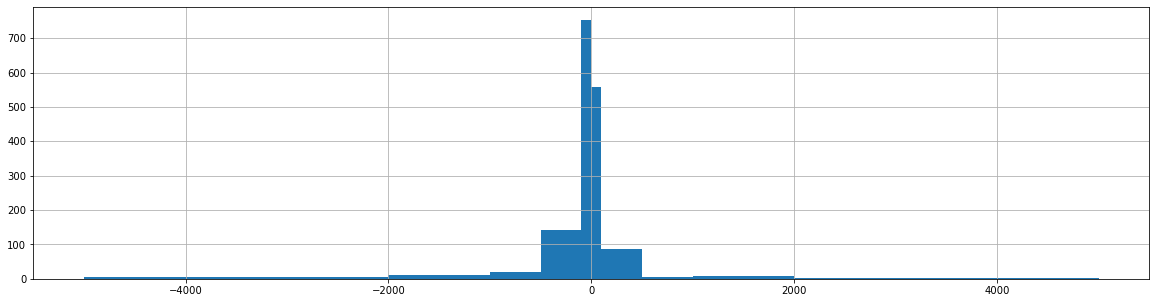

In [56]:
m_df['delta'].hist(bins=[-5000,-2000,-1000,-500,-100,0,100,500,1000,2000,5000], figsize=(20,5))

### Graph Analysis

<AxesSubplot:>

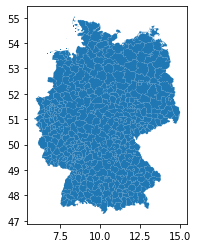

In [41]:
# Import map of German counties as geopandas file
boundaries = gpd.read_file('./data/DEU_adm/DEU_adm3.shp', encoding = "utf-8")

boundaries.plot()


<AxesSubplot:>

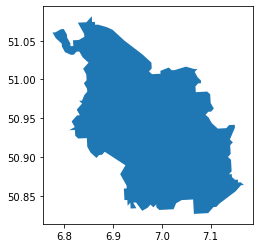

In [42]:
#Take only Cologne
cologne=boundaries[boundaries["ID_3"]==289]
cologne.plot()

In [57]:
# create geo dataframe for Merchants

from shapely.geometry import Point

m_gdf = gpd.GeoDataFrame(m_df, geometry=gpd.points_from_xy(m_df['Longitude'], m_df['Latitude']))

m_gdf.crs = {'init' :'epsg:4326'}

m_gdf.head()

/Users/kultiginbozdemir/opt/anaconda3/envs/CO2/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


MerchantId  \
Id                                                                           
83787f7a-b659-44b6-a8aa-d1ef5b958a65  ed2c2eea-8399-4779-a9ea-dafb77878965   
4cd61f39-ddce-449f-8d1a-ef95c7b25307  cc8b8b51-efd7-4d74-84c8-4721619867df   
fa17e91f-cdfb-4912-81c9-92cd0b87328e  78ecc5a3-0ea0-4820-9fd2-637c95d73782   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c  f9b37c73-3a67-47b3-82cd-cfd1d6fafd6a   
f421a5f6-ba67-4336-afc3-021a04da5005  556becfc-1aac-43e2-87d9-cbc3fab0f4b0   

                                                           Name  Longitude  \
Id                                                                           
83787f7a-b659-44b6-a8aa-d1ef5b958a65   SAP WDF49 - Food Factory   8.642271   
4cd61f39-ddce-449f-8d1a-ef95c7b25307                  Guten Dag  13.413539   
fa17e91f-cdfb-4912-81c9-92cd0b87328e   Gasthaus Brückenschänke    7.771990   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c                      Com A  13.422482   
f421a5f6-ba67-4336-afc3-021a04da5005  BLE - Betriebsgastronomie   7.184823   

                                       Latitude                CreationDate  \
Id                                                                            
83787f7a-b659-44b6-a8aa-d1ef5b958a65  49.292543  2021-06-28 11:56:10.812661   
4cd61f39-ddce-449f-8d1a-ef95c7b25307  52.548254  2020-07-14 19:44:49.101383   
fa17e91f-cdfb-4912-81c9-92cd0b87328e  49.943655  2021-01-20 10:25:12.831661   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c  52.500293  2020-08-26 06:53:57.107271   
f421a5f6-ba67-4336-afc3-021a04da5005  50.672743  2020-10-01 09:33:59.032472   

                                      CategoryId  SellsOfflineCards  \
Id                                                                    
83787f7a-b659-44b6-a8aa-d1ef5b958a65           4              False   
4cd61f39-ddce-449f-8d1a-ef95c7b25307           2              False   
fa17e91f-cdfb-4912-81c9-92cd0b87328e           2              False   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c           2              False   
f421a5f6-ba67-4336-afc3-021a04da5005           4              False   

                                              StreetAddress ZipCode  \
Id                                                                    
83787f7a-b659-44b6-a8aa-d1ef5b958a65  Dietmar-Hopp-Allee 17   69190   
4cd61f39-ddce-449f-8d1a-ef95c7b25307  Schönhauser Allee 120   10437   
fa17e91f-cdfb-4912-81c9-92cd0b87328e         Staatsstraße 4   55442   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c      Oranienstraße 191   10999   
f421a5f6-ba67-4336-afc3-021a04da5005      Deichmanns Aue 29   53179   

                                            City Country  CanGetBowl  \
Id                                                                     
83787f7a-b659-44b6-a8aa-d1ef5b958a65    Walldorf     NaN        True   
4cd61f39-ddce-449f-8d1a-ef95c7b25307      Berlin      DE       False   
fa17e91f-cdfb-4912-81c9-92cd0b87328e  Stromberg      NaN        True   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c      Berlin     NaN        True   
f421a5f6-ba67-4336-afc3-021a04da5005        Bonn     NaN        True   

                                      CanPreorder  IsPublished  ShowInStats  \
Id                                                                            
83787f7a-b659-44b6-a8aa-d1ef5b958a65        False         True         True   
4cd61f39-ddce-449f-8d1a-ef95c7b25307         True         True         True   
fa17e91f-cdfb-4912-81c9-92cd0b87328e        False         True         True   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c        False         True         True   
f421a5f6-ba67-4336-afc3-021a04da5005        False        False         True   

                                          in     out  delta  \
Id                                                            
83787f7a-b659-44b6-a8aa-d1ef5b958a65     NaN     NaN    NaN   
4cd61f39-ddce-449f-8d1a-ef95c7b25307     NaN     NaN    NaN   
fa17e91f-cdfb-4912-81c9-92cd0b87328e   340.0   340.0    0.0   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c   889.0  

In [58]:
#Geospatial join of merchants and Cologne polygon
vytal_cologne=gpd.sjoin( cologne, m_gdf, op='contains' ).to_crs(4326)
print(vytal_cologne.shape)
vytal_cologne.index=vytal_cologne["index_right"]
m_cologne=m_gdf[m_gdf.index.isin(vytal_cologne.index)]
m_cologne.shape

(285, 33)


/Users/kultiginbozdemir/opt/anaconda3/envs/CO2/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  


(285, 19)

In [59]:
m_cologne.head(2)

MerchantId  \
Id                                                                           
37be8a82-5cde-4101-9c6d-26240f05bcae  b28cedf5-376e-45c8-b5bd-3d2ab56dc61a   
ead012ba-13fd-4ad9-b0e6-5523a310bf80  b17da208-14d7-4402-bf44-458db5a4ab54   

                                                                       Name  \
Id                                                                            
37be8a82-5cde-4101-9c6d-26240f05bcae                           Brotkäppchen   
ead012ba-13fd-4ad9-b0e6-5523a310bf80  Generali Hansaring Betriebsrestaurant   

                                      Longitude   Latitude  \
Id                                                           
37be8a82-5cde-4101-9c6d-26240f05bcae   6.944754  50.948689   
ead012ba-13fd-4ad9-b0e6-5523a310bf80   6.953723  50.949590   

                                                    CreationDate  CategoryId  \
Id                                                                             
37be8a82-5cde-4101-9c6d-26240f05bcae  2020-01-09 13:29:35.773989           2   
ead012ba-13fd-4ad9-b0e6-5523a310bf80  2020-08-06 19:37:53.902445           4   

                                      SellsOfflineCards    StreetAddress  \
Id                                                                         
37be8a82-5cde-4101-9c6d-26240f05bcae              False   Im Mediapark 5   
ead012ba-13fd-4ad9-b0e6-5523a310bf80              False  Hansaring 40-50   

                                     ZipCode  City Country  CanGetBowl  \
Id                                                                       
37be8a82-5cde-4101-9c6d-26240f05bcae   50670  Köln     NaN        True   
ead012ba-13fd-4ad9-b0e6-5523a310bf80   50670  Köln     NaN        True   

                                      CanPreorder  IsPublished  ShowInStats  \
Id                                                                            
37be8a82-5cde-4101-9c6d-26240f05bcae        False         True         True   
ead012ba-13fd-4ad9-b0e6-5523a310bf80        False         True         True   

                                          in     out  delta  \
Id                                                            
37be8a82-5cde-4101-9c6d-26240f05bcae     NaN     NaN    NaN   
ead012ba-13fd-4ad9-b0e6-5523a310bf80  4139.0  4219.0  -80.0   

                                                      geometry  
Id                                                              
37be8a82-5cde-4101-9c6d-26240f05bcae  POINT (6.94475 50.94869)  
ead012ba-13fd-4ad9-b0e6-5523a310bf80  POINT (6.95372 50.94959)

<AxesSubplot:title={'center':'Vytal in Cologne'}>

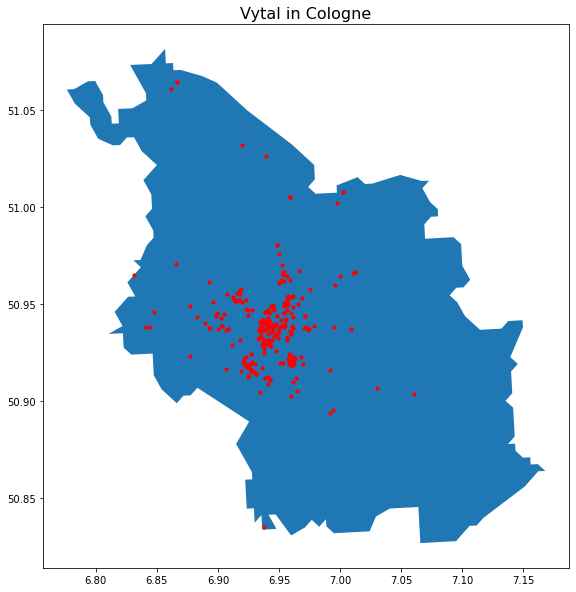

In [60]:

fig, ax = plt.subplots(figsize=(12,10))
plt.title('Vytal in Cologne', fontsize=16, color='black')
cologne.plot(ax=ax)
m_cologne.plot(ax=ax, markersize=10, color='red')

In [167]:
in_cologne=in_df[in_df["StoreId"].isin(m_cologne.index)]

out_cologne=out_df[out_df["StoreId"].isin(m_cologne.index)]

print("Size reduction:", in_df.shape, " vs.", in_cologne.shape)

print("Size reduction:", out_df.shape, " vs.", out_cologne.shape)

Size reduction: (1820995, 11)  vs. (222164, 11)
Size reduction: (1862237, 12)  vs. (229677, 12)


In [168]:
in_cologne['Source']=in_cologne['UserId']
in_cologne['Target']=in_cologne['StoreId']
in_cologne.to_csv('./data/in_cologne.csv')

/Users/kultiginbozdemir/opt/anaconda3/envs/CO2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kultiginbozdemir/opt/anaconda3/envs/CO2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [169]:
out_cologne['Target']=out_cologne['UserId']
out_cologne['Source']=out_cologne['StoreId']
out_cologne.to_csv('./data/out_cologne.csv')

/Users/kultiginbozdemir/opt/anaconda3/envs/CO2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kultiginbozdemir/opt/anaconda3/envs/CO2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [179]:
G=nx.MultiDiGraph()
for ind, row in in_cologne.iterrows():
    
    G.add_edge(row["UserId"],row["StoreId"], date=row["OwnerTill"], container_id=row["ContainerId"],container_type=row["ContainerType"])
    #G.nodes[row["StoreId"]]["node_type"]="partner"
    #G.nodes[row["UserId"]]["node_type"]="consumer"

In [180]:
for ind, row in out_cologne.iterrows():
    G.add_edge(row["StoreId"], row["UserId"], date=row["OwnerSince"],  container_id=row["ContainerId"], container=row["ContainerType"])
    #G.nodes[row["StoreId"]]["node_type"]="partner"
    #G.nodes[row["UserId"]]["node_type"]="consumer"

In [181]:
len(G.edges)

451841

## Convert to directed graph with counts

In [183]:
G.number_of_edges()

451841

In [184]:


# create weighted graph from M
D = nx.DiGraph()
for u,v in G.edges():
    D.add_edge(u, v, count=G.number_of_edges(u,v))

In [185]:
D.number_of_edges()

49419

In [186]:
summ=0
for e in D.edges(data=True):
    #(e[2]['count'])
    summ=int(summ)+int(e[2]['count'])
print(summ)


451841


In [187]:
nx.set_node_attributes(D,D.degree(), 'degree')

In [188]:
for n in D.nodes():
    try:
        D.nodes[n]['type']=u_df.loc[n,'ClaimType']
    except: 
        D.nodes[n]['type']='store'

In [189]:
Dp = D.subgraph([n for n in D.nodes() if D.out_degree(n)>1])

In [190]:
len([n for n in Dp.nodes() if Dp.nodes[n]['type']=='store'])

233

In [191]:
len(Dp.edges)

30799

In [192]:
Dp.number_of_nodes()

5435

In [196]:
Dp_2=nx.algorithms.core.k_core(Dp,2)

print('number of edges:', Dp_2.number_of_edges())

print('number of nodes:',Dp_2.number_of_nodes())

number of edges: 30796
number of nodes: 5429


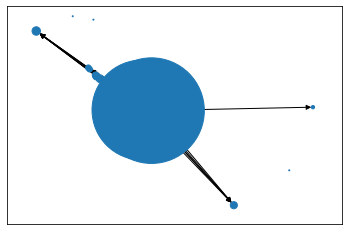

In [165]:
# plot nodes' size with respect to their degrees
pos = nx.spring_layout(Dp, k=0.5)
size=list(dict(nx.degree(Dp)).values())
size1=list()
for x in size:
    x=x*10+1
    size1.append(x)
vytalGraph=nx.draw_networkx(Dp, node_size=size1, with_labels=False)
plt.show(vytalGraph)



### Remove Vytal accounts

In [97]:
# Import regions
re_df=pd.read_csv('./data/Accounts Realocation of Containers .csv', sep=',', index_col='UserId')
re_df.head()

User
UserId                                                 
66feb96f-7f72-49f5-9b5d-facd882c5685             Niclas
2e94a786-c2d3-457a-ae84-b9dffab9b798  CargoBike Cologne
cfa543d9-2a75-4eda-a582-870f6b4533e7              Jurij
fe3e584e-8d4c-4ce9-a720-4d2fc77f5dea             Verena
7dd7ba46-cb82-4295-8210-6fdfa7db1d82            Kerstin

In [106]:
re_df.shape

(5, 1)

In [113]:
in_df[in_df['UserId'].isin(re_df.index)]

Empty DataFrame
Columns: [Unnamed: 0, UserId, ExternalPickpackId, StoreId, StoreName, LocationId, TransactionId, OwnerSince, OwnerTill, ContainerId, ContainerType]
Index: []

In [114]:
out_df[out_df['UserId'].isin(re_df.index)]

Empty DataFrame
Columns: [Unnamed: 0, UserId, ExternalPickpackId, StoreId, StoreName, LocationId, TransactionId, OwnerSince, OwnerTill, ContainerId, DeliveryTokenId, ContainerType]
Index: []

In [135]:
u_df[u_df.index.isin(re_df.index)]

Unnamed: 0  \
UserId                                             
66feb96f-7f72-49f5-9b5d-facd882c5685       15250   
fe3e584e-8d4c-4ce9-a720-4d2fc77f5dea       45994   
7dd7ba46-cb82-4295-8210-6fdfa7db1d82      112881   
cfa543d9-2a75-4eda-a582-870f6b4533e7      203832   
2e94a786-c2d3-457a-ae84-b9dffab9b798      208602   

                                                  CreationTimestamp ClaimType  \
UserId                                                                          
66feb96f-7f72-49f5-9b5d-facd882c5685  2020-09-26 02:14:33.803959+00     admin   
fe3e584e-8d4c-4ce9-a720-4d2fc77f5dea  2021-01-04 16:43:26.445498+00     admin   
7dd7ba46-cb82-4295-8210-6fdfa7db1d82  2021-03-30 13:47:44.354565+00     admin   
cfa543d9-2a75-4eda-a582-870f6b4533e7   2021-08-09 08:57:50.14324+00     admin   
2e94a786-c2d3-457a-ae84-b9dffab9b798  2021-08-18 20:08:53.510563+00     admin   

                                      IsOfflineUser  
UserId                                               
66feb96f-7f72-49f5-9b5d-facd882c5685          False  
fe3e584e-8d4c-4ce9-a720-4d2fc77f5dea          False  
7dd7ba46-cb82-4295-8210-6fdfa7db1d82          False  
cfa543d9-2a75-4eda-a582-870f6b4533e7          False  
2e94a786-c2d3-457a-ae84-b9dffab9b798          False

In [166]:
U = D.subgraph([n for n in D.nodes() if D.nodes[n]['type']=='consumer'])

{'degree': DiDegreeView({'cbde804e-b04d-41d2-a57e-3aec91465301': 4, 'e6e6d4e5-56dd-4361-8ebd-ebdd865f41ea': 1594, '74a627d5-9783-4c2b-87b1-f5aa3f617f19': 1141, 'db70348b-76ae-4bff-b3ef-c1c727cc3be7': 19, '4e8a5e0f-0c71-4f4d-9f14-4a0b07a0abe9': 8, '51885240-9a50-4945-86c7-322651498767': 8, '66805633-359f-4efc-8374-77c7c155716e': 4, '1abcb260-3da1-4501-8f4c-38f795489377': 18, '239bc988-d39f-4a4a-8161-d7ffaca3728f': 4, '56b19a06-f5d8-44b2-853f-7f734a1e02fa': 10, 'b7f714cf-4fd7-4aaa-a6f7-170a0aeb612c': 8, '38d6c49a-6bc4-46c1-ad81-9766bedd0405': 22, '6babfe7d-f664-4417-a704-3af83928fae5': 13, '36260f74-3db7-4f1c-a80b-01905887b257': 2, '6d229945-2e6c-4cf1-81cb-33f598f50250': 8, 'bcb2dc9d-dd8d-4e15-bda3-713a525d7c5a': 8, '80709fcd-8e9f-4d08-b620-483be167ff96': 2, '02e74321-b0cd-45f0-a6b8-f0977c850d4d': 4, 'e664a6b0-ca36-4cb2-bdac-0a01ce89db5a': 5, '24154541-ee2f-4033-888b-e3c61c3a1212': 9, '1e4358fe-9004-41c9-a687-eaaada9734d4': 4, '54b4269b-2e56-4ef3-8eda-739d78d4494e': 7, 'ee160382-de57-4e6